In [2]:
from datetime import datetime
import glob

import matplotlib
%matplotlib inline
import pandas as pd

files = glob.glob("data/*fast.csv")

# IF you run into an error in this cell, ask xtian
# there's a bug in the data
BAD_F = "data/b827ebbe2801_1521218535.02_fast.csv"
df = pd.concat(pd.read_csv(f) for f in files)
df["timestamp"] = df["time"].apply(datetime.fromtimestamp)
df = df.sort_values("timestamp")

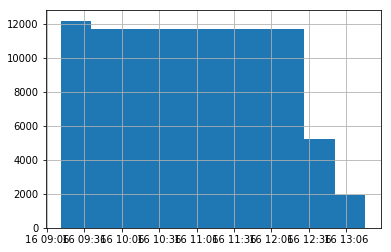

In [3]:
df["timestamp"].hist()

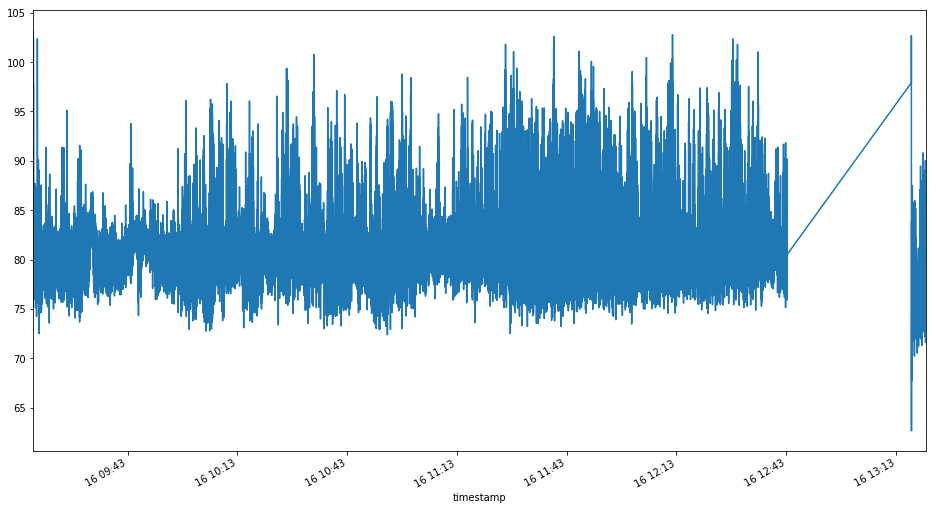

In [4]:
# april 30 - 
df.set_index("timestamp")["dBZS"].plot(figsize=(16, 9))

In [19]:
# read in the log, and make the header names, dropping the first 8 rows, and resetting the index
air_df = pd.read_csv("logs/1523628079.log", header=None, names=["PM25", "PM10"])[8:].reset_index(drop=True)

#
times_df = pd.read_csv('logs/timestamps_1523628079.log', header=None, names=['timestamps']).drop_duplicates().reset_index(drop=True)

# sanity check to make sure these are the same len
assert len(air_df)  == len(times_df)

In [25]:
# join the data on index
final_air_df = air_df.join(times_df)

# convert to datetime, and add units 
# number of seconds since jan 1 1970 (yay unix!)
final_air_df['time'] = pd.to_datetime(times_df['timestamps'], unit='s')

In [32]:
final_air_df.head()

,PM25,PM10,timestamps,time
0,2256,232,1523628642,2018-04-13 14:10:42
1,2006,196,1523628701,2018-04-13 14:11:41
2,1826,219,1523628760,2018-04-13 14:12:40
3,1435,158,1523628820,2018-04-13 14:13:40
4,1340,159,1523628879,2018-04-13 14:14:39


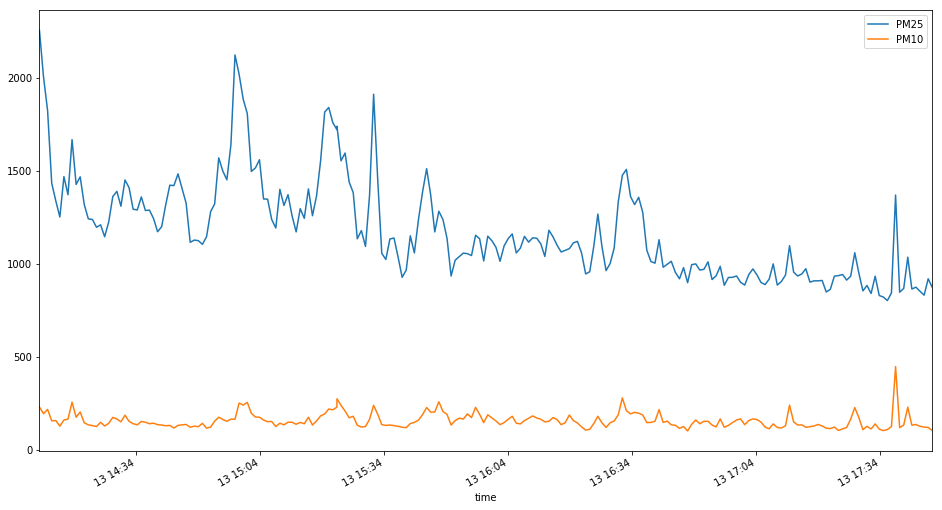

In [33]:
ax = final_air_df.plot('time', 'PM25')
final_air_df.plot('time','PM10', ax=ax, figsize=(16,9))

In [34]:
# sub mean and divide by std
# normalize, rolling mean, make pretty
# add baselines
# events 